#  SEAS6414 Python Applications in Data Analytics
## Homework 4

In [1]:
# Import our libraries

import numpy as np
import pandas as pd

# 1) Dataset: homework4file1.csv

In [2]:
# First let's read in the dataset

df1 = pd.read_csv('homework4_file1.csv')
df1.head()

,merchant,time,amount_usd_in_cents
0,d087d4c321,2034-12-11 22:16:41,5059
1,fe1cb2e840,2034-08-13 21:11:59,12743
2,878047f4b9,2033-06-05 21:15:00,7601
3,3932608d23,2034-04-28 19:55:01,5790
4,84a09b4188,2034-07-26 04:37:05,6153


### 1.1 Average sales amount

In [3]:
# let's first calculate average sales gy mechant using pandas.groupby
average_sales_bymerchant = df1.groupby('merchant')['amount_usd_in_cents'].mean().reset_index()

# lets convert it to dollars (from cents)
average_sales_bymerchant['amount_usd_in_cents'] = average_sales_bymerchant['amount_usd_in_cents'] /100 

# Let's rename the column to show is the average and dollars
average_sales_bymerchant.rename(columns={'amount_usd_in_cents': 'trans_amount_avg'}, inplace=True)

average_sales_bymerchant.head()

,merchant,trans_amount_avg
0,00057d4302,12.175000
1,000ed1585f,280.502500
2,000f8c3297,66.355625
3,0020aefbd9,35.890000
4,0026f256ac,348.800000


In [4]:
# Final step is merge this average back into the original dataframe
df1 = pd.merge(df1, average_sales_bymerchant, on='merchant', how='left')

df1.head()

,merchant,time,amount_usd_in_cents,trans_amount_avg
0,d087d4c321,2034-12-11 22:16:41,5059,75.390125
1,fe1cb2e840,2034-08-13 21:11:59,12743,87.658036
2,878047f4b9,2033-06-05 21:15:00,7601,62.246958
3,3932608d23,2034-04-28 19:55:01,5790,85.868919
4,84a09b4188,2034-07-26 04:37:05,6153,168.038500


### 1.2 Total amount volume

In [5]:
# let's first calculate total sales by mechant using pandas.groupby
total_sales_bymerchant = df1.groupby('merchant')['amount_usd_in_cents'].sum().reset_index()

# lets convert it to dollars
total_sales_bymerchant['amount_usd_in_cents'] = total_sales_bymerchant['amount_usd_in_cents'] /100 

# Let's rename the column to show is the average and dollars
total_sales_bymerchant.rename(columns={'amount_usd_in_cents': 'trans_amount_volume'}, inplace=True)

total_sales_bymerchant.head()

,merchant,trans_amount_volume
0,00057d4302,24.35
1,000ed1585f,1122.01
2,000f8c3297,1061.69
3,0020aefbd9,35.89
4,0026f256ac,348.80


In [6]:
# Final step is merge this average back into the original dataframe
df1 = pd.merge(df1, total_sales_bymerchant, on='merchant', how='left')

df1.head()

,merchant,time,amount_usd_in_cents,trans_amount_avg,trans_amount_volume
0,d087d4c321,2034-12-11 22:16:41,5059,75.390125,48400.46
1,fe1cb2e840,2034-08-13 21:11:59,12743,87.658036,9817.70
2,878047f4b9,2033-06-05 21:15:00,7601,62.246958,14939.27
3,3932608d23,2034-04-28 19:55:01,5790,85.868919,3177.15
4,84a09b4188,2034-07-26 04:37:05,6153,168.038500,3360.77


### 1.3 Transaction frequency

In [7]:
# let's first calculate count of transactions by mechant using pandas.groupby
total_count_bymerchant = df1.groupby('merchant')['trans_amount_volume'].count().reset_index()

# Let's rename the column to show is the average and dollars
total_count_bymerchant.rename(columns={'trans_amount_volume': 'trans_frequency'}, inplace=True)

total_count_bymerchant.head()

,merchant,trans_frequency
0,00057d4302,2
1,000ed1585f,4
2,000f8c3297,16
3,0020aefbd9,1
4,0026f256ac,1


In [8]:
# Final step is merge this average back into the original dataframe
df1 = pd.merge(df1, total_count_bymerchant, on='merchant', how='left')

df1.head()

,merchant,time,amount_usd_in_cents,trans_amount_avg,trans_amount_volume,trans_frequency
0,d087d4c321,2034-12-11 22:16:41,5059,75.390125,48400.46,642
1,fe1cb2e840,2034-08-13 21:11:59,12743,87.658036,9817.70,112
2,878047f4b9,2033-06-05 21:15:00,7601,62.246958,14939.27,240
3,3932608d23,2034-04-28 19:55:01,5790,85.868919,3177.15,37
4,84a09b4188,2034-07-26 04:37:05,6153,168.038500,3360.77,20


### 1.4 Recency from 1/1/2035

In [9]:
# Let's use groupby and max to get last transaction by merchant
last_transaction_date = df1.groupby('merchant')['time'].max().reset_index()
last_transaction_date.head()

,merchant,time
0,00057d4302,2033-05-30 04:20:31
1,000ed1585f,2034-07-10 15:57:48
2,000f8c3297,2034-11-03 12:56:38
3,0020aefbd9,2034-05-30 21:55:06
4,0026f256ac,2033-09-15 01:17:32


In [10]:
# We need to convert the time feature to datetime
last_transaction_date['time'] = pd.to_datetime(last_transaction_date['time'])

# Now we can calculate difference in days from January 1, 2035
specific_date = pd.Timestamp('2035-01-01')
last_transaction_date['trans_recency'] = (specific_date - last_transaction_date['time']).dt.days
last_transaction_date.head()

,merchant,time,trans_recency
0,00057d4302,2033-05-30 04:20:31,580
1,000ed1585f,2034-07-10 15:57:48,174
2,000f8c3297,2034-11-03 12:56:38,58
3,0020aefbd9,2034-05-30 21:55:06,215
4,0026f256ac,2033-09-15 01:17:32,472


In [11]:
# Let's drop column time and merge left
last_transaction_date = last_transaction_date.drop('time', axis=1)

df1 = pd.merge(df1, last_transaction_date, on='merchant', how='left')

df1.head()

,merchant,time,amount_usd_in_cents,trans_amount_avg,trans_amount_volume,trans_frequency,trans_recency
0,d087d4c321,2034-12-11 22:16:41,5059,75.390125,48400.46,642,1
1,fe1cb2e840,2034-08-13 21:11:59,12743,87.658036,9817.70,112,2
2,878047f4b9,2033-06-05 21:15:00,7601,62.246958,14939.27,240,169
3,3932608d23,2034-04-28 19:55:01,5790,85.868919,3177.15,37,57
4,84a09b4188,2034-07-26 04:37:05,6153,168.038500,3360.77,20,13


### 1.5 Average time between transactions

In [12]:
# Sort transactions by 'merchant' and 'time'
df1_sorted = df1.sort_values(by=['merchant', 'time'])

# Calculate the time differences
df1_sorted['time'] = pd.to_datetime(df1_sorted['time'])
df1_sorted['time_diff'] = df1_sorted.groupby('merchant')['time'].diff()

# Convert time differences to hours
df1_sorted['time_diff_hours'] = df1_sorted['time_diff'].dt.total_seconds() / 3600

# Calculate the average time difference for each merchant
average_time_diff = df1_sorted.groupby('merchant')['time_diff_hours'].mean().reset_index()
average_time_diff.rename(columns={'time_diff_hours': 'avg_time_btwn_trans'}, inplace=True)
average_time_diff.head()

,merchant,avg_time_btwn_trans
0,00057d4302,1.432500
1,000ed1585f,3424.033796
2,000f8c3297,508.465889
3,0020aefbd9,NaN
4,0026f256ac,NaN


In [13]:
# I see some NaN. That may be because some merchants have only one transaction, thus the difference was NaN.
# Let's check
transaction_counts = df1.groupby('merchant').size()

# Step 2: Count the number of merchants with only one transaction
num_merchants_single_transaction = (transaction_counts == 1).sum()
num_merchants_single_transaction

2649

In [14]:
# Yes indeed, we found 2,649 merchants with a single transaction
# We will replace all NA's with a 0
average_time_diff['avg_time_btwn_trans'] = average_time_diff['avg_time_btwn_trans'].fillna(0)


In [15]:
# now let's merge it to the main dataframe
df1 = pd.merge(df1, average_time_diff, on='merchant', how='left')

df1.head()

,merchant,time,amount_usd_in_cents,trans_amount_avg,trans_amount_volume,trans_frequency,trans_recency,avg_time_btwn_trans
0,d087d4c321,2034-12-11 22:16:41,5059,75.390125,48400.46,642,1,17.065124
1,fe1cb2e840,2034-08-13 21:11:59,12743,87.658036,9817.70,112,2,73.839257
2,878047f4b9,2033-06-05 21:15:00,7601,62.246958,14939.27,240,169,56.152850
3,3932608d23,2034-04-28 19:55:01,5790,85.868919,3177.15,37,57,421.882778
4,84a09b4188,2034-07-26 04:37:05,6153,168.038500,3360.77,20,13,574.601696


### 1.6 Average growth rate in transaction amounts

In [16]:
# Sort the DataFrame by 'merchant' and 'time'
df1_sorted = df1.sort_values(by=['merchant', 'time'])

# Calculate the growth rate for each transaction
# The growth rate is calculated as (current amount - previous amount) / previous amount
# I ended up using transform intead of apply becauee apply was giving me weird error.
df1_sorted['growth_rate'] = df1_sorted.groupby('merchant')['amount_usd_in_cents'].transform(lambda x: x.pct_change())

#Calculate the average growth rate for each merchant
average_growth_rates = df1_sorted.groupby('merchant')['growth_rate'].mean().reset_index()

# We will replace all NA's with a 0
average_growth_rates['growth_rate'] = average_growth_rates['growth_rate'].fillna(0)

# now let's merge it to the main dataframe
df1 = pd.merge(df1, average_growth_rates, on='merchant', how='left')

df1.head()

,merchant,time,amount_usd_in_cents,trans_amount_avg,trans_amount_volume,trans_frequency,trans_recency,avg_time_btwn_trans,growth_rate
0,d087d4c321,2034-12-11 22:16:41,5059,75.390125,48400.46,642,1,17.065124,0.265681
1,fe1cb2e840,2034-08-13 21:11:59,12743,87.658036,9817.70,112,2,73.839257,0.428800
2,878047f4b9,2033-06-05 21:15:00,7601,62.246958,14939.27,240,169,56.152850,0.440665
3,3932608d23,2034-04-28 19:55:01,5790,85.868919,3177.15,37,57,421.882778,0.245299
4,84a09b4188,2034-07-26 04:37:05,6153,168.038500,3360.77,20,13,574.601696,0.352590


### 1.7 Deliverables

In [17]:
# Shape of new dataset
print("Shape of new dataset: {}".format(df1.shape))

Shape of new dataset: (100000, 9)


In [18]:
# Top 5 rows of new dataset
df1.head()

,merchant,time,amount_usd_in_cents,trans_amount_avg,trans_amount_volume,trans_frequency,trans_recency,avg_time_btwn_trans,growth_rate
0,d087d4c321,2034-12-11 22:16:41,5059,75.390125,48400.46,642,1,17.065124,0.265681
1,fe1cb2e840,2034-08-13 21:11:59,12743,87.658036,9817.70,112,2,73.839257,0.428800
2,878047f4b9,2033-06-05 21:15:00,7601,62.246958,14939.27,240,169,56.152850,0.440665
3,3932608d23,2034-04-28 19:55:01,5790,85.868919,3177.15,37,57,421.882778,0.245299
4,84a09b4188,2034-07-26 04:37:05,6153,168.038500,3360.77,20,13,574.601696,0.352590


In [19]:
# Decriptive statistics of new dataset

df1.describe()

,amount_usd_in_cents,trans_amount_avg,trans_amount_volume,trans_frequency,trans_recency,avg_time_btwn_trans,growth_rate
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.551595e+04,155.159504,14169.500464,183.726320,60.013750,323.276482,0.916071
std,5.998154e+04,484.018591,21325.864147,283.563244,119.554283,722.022726,4.515423
min,2.010000e+02,2.090000,2.090000,1.000000,0.000000,0.000000,-0.999184
25%,3.238000e+03,49.641909,1721.170000,17.000000,2.000000,34.382602,0.211093
50%,6.119000e+03,76.808156,6189.110000,65.000000,10.000000,99.985581,0.389375
75%,1.263900e+04,135.511429,15856.520000,231.000000,51.000000,307.064601,0.855422
max,1.038551e+07,103855.080000,154998.270000,1673.000000,726.000000,15327.179167,606.651309


In [20]:
# Let's do some exploratory analysis on the calculated fields
# We only need the first row of each merchant for the calculated fields, as all values are the same
new_df1 = df1.groupby('merchant').first().reset_index()

# Select only the columns you need
new_df1 = new_df1[['merchant', 'trans_amount_avg', 'trans_amount_volume', 'trans_frequency', 
                   'trans_recency', 'avg_time_btwn_trans', 'growth_rate']]
new_df1

,merchant,trans_amount_avg,trans_amount_volume,trans_frequency,trans_recency,avg_time_btwn_trans,growth_rate
0,00057d4302,12.175000,24.35,2,580,1.432500,0.106401
1,000ed1585f,280.502500,1122.01,4,174,3424.033796,-0.081319
2,000f8c3297,66.355625,1061.69,16,58,508.465889,0.226751
3,0020aefbd9,35.890000,35.89,1,215,0.000000,0.000000
4,0026f256ac,348.800000,348.80,1,472,0.000000,0.000000
...,...,...,...,...,...,...,...
7897,ffb94e1865,74.849694,17140.58,229,1,40.566519,0.221173
7898,ffc46fd720,27.600000,27.60,1,248,0.000000,0.000000
7899,ffe1f6b51a,54.626667,163.88,3,378,2183.744028,0.110038
7900,ffe26b900d,216.100000,432.20,2,137,5398.802222,-0.526122


In [21]:
new_df1.describe()

,trans_amount_avg,trans_amount_volume,trans_frequency,trans_recency,avg_time_btwn_trans,growth_rate
count,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000
mean,307.331837,1963.547248,12.655024,169.320299,749.494258,1.011811
std,1417.802723,6000.437800,46.531552,180.309019,1461.800367,9.954053
min,2.090000,2.090000,1.000000,0.000000,0.000000,-0.999184
25%,48.461774,102.520000,1.000000,25.000000,0.000000,0.000000
50%,90.536324,348.400000,3.000000,97.000000,170.447514,0.026518
75%,211.470500,1388.630000,8.000000,264.000000,841.515338,0.559049
max,103855.080000,154998.270000,1673.000000,726.000000,15327.179167,606.651309


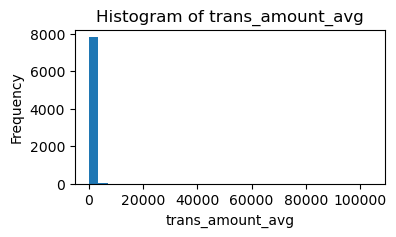

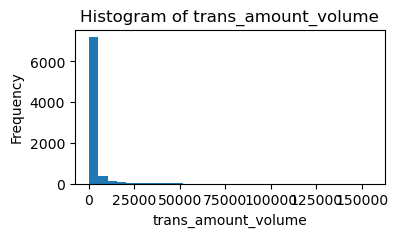

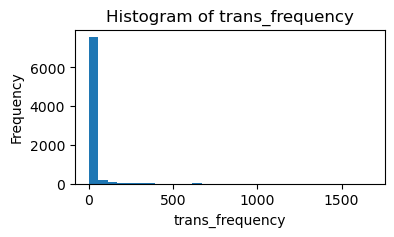

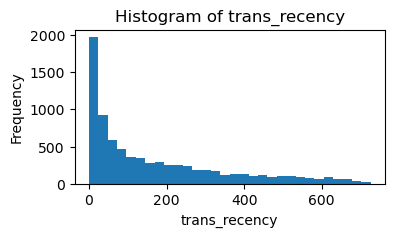

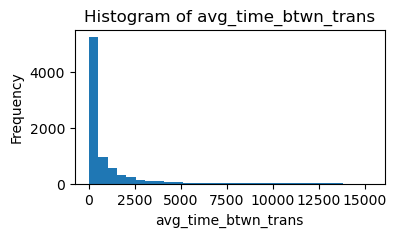

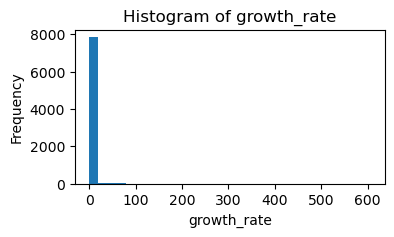

In [22]:

import matplotlib.pyplot as plt

numerical_cols = new_df1.select_dtypes(include=['number'])

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(4, 2))  # You can adjust the figure size as needed
    new_df1[col].hist(bins=30)  # You can adjust the number of bins
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)  # Turn off the grid if desired
    plt.show()


# 2 - salesdata.csv and productinfo.csv

### Data Loading and Merging

In [23]:
sales_df = pd.read_csv('sales_data.csv')
sales_df.head()

,TransactionID,ProductID,Date,Quantity,Price
0,1,136,2023-03-13,8,245.288680
1,2,121,2023-06-09,2,355.603776
2,3,179,2023-04-18,7,25.393345
3,4,142,2023-09-03,10,260.758110
4,5,101,2023-06-21,1,212.490775


In [24]:
product_df = pd.read_csv('product_info.csv')
product_df.head()

,ProductID,ProductName,Category
0,100,not,Clothing
1,101,ready,Clothing
2,102,fill,Books
3,103,avoid,Clothing
4,104,beyond,Toys


In [25]:
# now let's merge it to the main dataframe
merged_df = pd.merge(sales_df, product_df, on='ProductID', how='left')
merged_df.head()

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category
0,1,136,2023-03-13,8,245.288680,pull,Toys
1,2,121,2023-06-09,2,355.603776,left,Home Appliances
2,3,179,2023-04-18,7,25.393345,according,Books
3,4,142,2023-09-03,10,260.758110,hospital,Toys
4,5,101,2023-06-21,1,212.490775,ready,Clothing


### Data Cleaning:

In [26]:
# 1 Print all Nan by feature

print(merged_df.isna().sum())

TransactionID    0
ProductID        0
Date             0
Quantity         0
Price            0
ProductName      0
Category         0
dtype: int64


In [27]:
# NO missing (NaN) values

# Convert the Date to Datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.head()

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category
0,1,136,2023-03-13,8,245.288680,pull,Toys
1,2,121,2023-06-09,2,355.603776,left,Home Appliances
2,3,179,2023-04-18,7,25.393345,according,Books
3,4,142,2023-09-03,10,260.758110,hospital,Toys
4,5,101,2023-06-21,1,212.490775,ready,Clothing


### Data Analysis using Slicing and Indexing

In [28]:
# Create a new column ’TotalSale’, calculated as ’Quantity’ * ’Price’

merged_df['TotalSale'] = merged_df['Quantity'] * merged_df['Price']
merged_df.head()

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category,TotalSale
0,1,136,2023-03-13,8,245.288680,pull,Toys,1962.309438
1,2,121,2023-06-09,2,355.603776,left,Home Appliances,711.207552
2,3,179,2023-04-18,7,25.393345,according,Books,177.753412
3,4,142,2023-09-03,10,260.758110,hospital,Toys,2607.581102
4,5,101,2023-06-21,1,212.490775,ready,Clothing,212.490775


In [29]:
# Using slicing, create a subset DataFrame containing only transactions from the last quarter of
# the year(October,November,December).

# Filtered DataFrame
filtered_df = merged_df[merged_df['Date'].dt.month.isin([10, 11, 12])]
filtered_df.head()

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category,TotalSale
6,7,134,2023-11-06,3,182.179422,interview,Electronics,546.538266
8,9,128,2023-11-03,7,289.822865,factor,Home Appliances,2028.760058
9,10,192,2023-10-19,9,111.056713,almost,Home Appliances,999.510421
12,13,151,2023-10-18,8,199.656172,fast,Home Appliances,1597.249377
14,15,143,2023-11-30,10,293.555773,cup,Clothing,2935.557728


In [30]:
# Using Boolean indexing, find all transactions for a specific ’Category’ (e.g., ’Electronics’)
electronics_df = merged_df[merged_df['Category']== 'Electronics']
electronics_df.head()

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category,TotalSale
6,7,134,2023-11-06,3,182.179422,interview,Electronics,546.538266
50,51,164,2023-12-14,9,480.569963,energy,Electronics,4325.129668
54,55,166,2023-04-25,5,410.216571,group,Electronics,2051.082855
56,57,145,2023-08-21,5,405.021033,market,Electronics,2025.105166
66,67,166,2023-04-21,4,447.684220,group,Electronics,1790.736881


In [31]:
# Extract all transactions where the ’TotalSale’ is above the 75th percentile of the ’TotalSale’ column using NumPy functions 

# Calculate the 75th percentile of the 'TotalSale' column
percentile_75 = np.percentile(merged_df['TotalSale'], 75)

# Filter to get only values above percentile_75
high_sales_df = merged_df[merged_df['TotalSale'] > percentile_75]
high_sales_df.head()

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category,TotalSale
3,4,142,2023-09-03,10,260.758110,hospital,Toys,2607.581102
13,14,186,2023-01-31,8,405.014825,increase,Home Appliances,3240.118597
14,15,143,2023-11-30,10,293.555773,cup,Clothing,2935.557728
17,18,173,2023-08-08,9,458.959608,either,Toys,4130.636475
18,19,172,2023-06-03,6,363.442784,other,Books,2180.656707


### Advanced indexing



In [32]:
# Using loc and iloc, perform the following:
## –Select all rows for ’ProductID’ 101 and columns ’ProductName’ and ’TotalSale’.
## –Select every 10th row from the merged dataset and only the columns ’Date’ and ’Category’

selected_data_loc = merged_df.loc[merged_df['ProductID'] == 101, ['ProductName', 'TotalSale']]
selected_data_loc.head()

,ProductName,TotalSale
4,ready,212.490775
58,ready,1331.007870
262,ready,3311.017493
496,ready,1565.745895
785,ready,74.588211


In [33]:
every_10_iloc = merged_df.iloc[::10][['Date', 'Category']]
every_10_iloc.head()

,Date,Category
0,2023-03-13,Toys
10,2023-05-16,Home Appliances
20,2023-12-18,Home Appliances
30,2023-12-05,Books
40,2023-04-07,Books


### Grouping and Aggregation

In [34]:
# Group the data by ’Category’ and calculate the total and average ’TotalSale’ for each category.

grouped_df = merged_df.groupby('Category')['TotalSale'].agg(['sum', 'mean']).reset_index()
grouped_df.head()

,Category,sum,mean
0,Books,2.756942e+06,1405.169284
1,Clothing,2.547137e+06,1339.893113
2,Electronics,2.151251e+06,1468.430950
3,Home Appliances,3.339347e+06,1414.378361
4,Toys,3.320096e+06,1436.649185


### Time-Series Analysis

In [35]:
merged_df.head()

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category,TotalSale
0,1,136,2023-03-13,8,245.288680,pull,Toys,1962.309438
1,2,121,2023-06-09,2,355.603776,left,Home Appliances,711.207552
2,3,179,2023-04-18,7,25.393345,according,Books,177.753412
3,4,142,2023-09-03,10,260.758110,hospital,Toys,2607.581102
4,5,101,2023-06-21,1,212.490775,ready,Clothing,212.490775


In [36]:
# Resample the data on a monthly basis and calculate the total ’Quantity’ sold per month.

# Set the datetime column as the index
merged_df.set_index('Date', inplace=True)

# Resample by month and sum the 'Quantity' column
monthly_quantity = merged_df['Quantity'].resample('M').sum()
monthly_quantity.head()

Date
2023-01-31     902
2023-02-28    4175
2023-03-31    4874
2023-04-30    4375
2023-05-31    4851
Freq: M, Name: Quantity, dtype: int64

# Zillow

In [37]:
zillow_df = pd.read_csv('zillow_feature_sample.csv')
zillow_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,12833975,NaN,NaN,NaN,3.0,4.0,NaN,6.0,3.0,NaN,...,NaN,NaN,155403.0,304592.0,2016.0,149189.0,3708.29,NaN,NaN,6.037409e+13
1,11070096,1.0,NaN,NaN,4.0,4.0,NaN,7.0,4.0,NaN,...,NaN,NaN,493070.0,821783.0,2016.0,328713.0,10087.59,NaN,NaN,6.037108e+13
2,12752672,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,NaN,...,NaN,NaN,126695.0,247962.0,2016.0,121267.0,3377.86,NaN,NaN,6.037504e+13
3,11338563,NaN,NaN,NaN,3.0,4.0,NaN,7.0,3.0,NaN,...,NaN,NaN,130500.0,308900.0,2016.0,178400.0,3578.92,NaN,NaN,6.037920e+13
4,17098704,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,...,1.0,NaN,142271.0,223101.0,2016.0,80830.0,2564.86,NaN,NaN,6.111000e+13


In [38]:
# Lets see Nan by feature and what percentage of total is missing

# Calculate total NaN count for each column
nan_count = zillow_df.isna().sum()

# Calculate percentage of NaN values for each column
nan_percentage = (zillow_df.isna().sum() / len(zillow_df)) * 100

# Create a summary table
nan_summary = pd.DataFrame({
    'Column': zillow_df.columns,
    'Total NaN': nan_count,
    'Percentage NaN': nan_percentage
})

# Reset the index to make it more readable
nan_summary = nan_summary.reset_index(drop=True)

print(nan_summary)


                          Column  Total NaN  Percentage NaN
0                       parcelid          0            0.00
1          airconditioningtypeid       7219           72.19
2       architecturalstyletypeid       9987           99.87
3                   basementsqft       9996           99.96
4                    bathroomcnt         13            0.13
5                     bedroomcnt         13            0.13
6            buildingclasstypeid       9961           99.61
7          buildingqualitytypeid       3530           35.30
8              calculatedbathnbr        388            3.88
9                     decktypeid       9932           99.32
10      finishedfloor1squarefeet       9305           93.05
11  calculatedfinishedsquarefeet        149            1.49
12          finishedsquarefeet12        859            8.59
13          finishedsquarefeet13       9974           99.74
14          finishedsquarefeet15       9388           93.88
15          finishedsquarefeet50       9

### We will use the package 'missingno" to do some visualizations of missing values. This way we can check visually if we can identify some corelations between features.

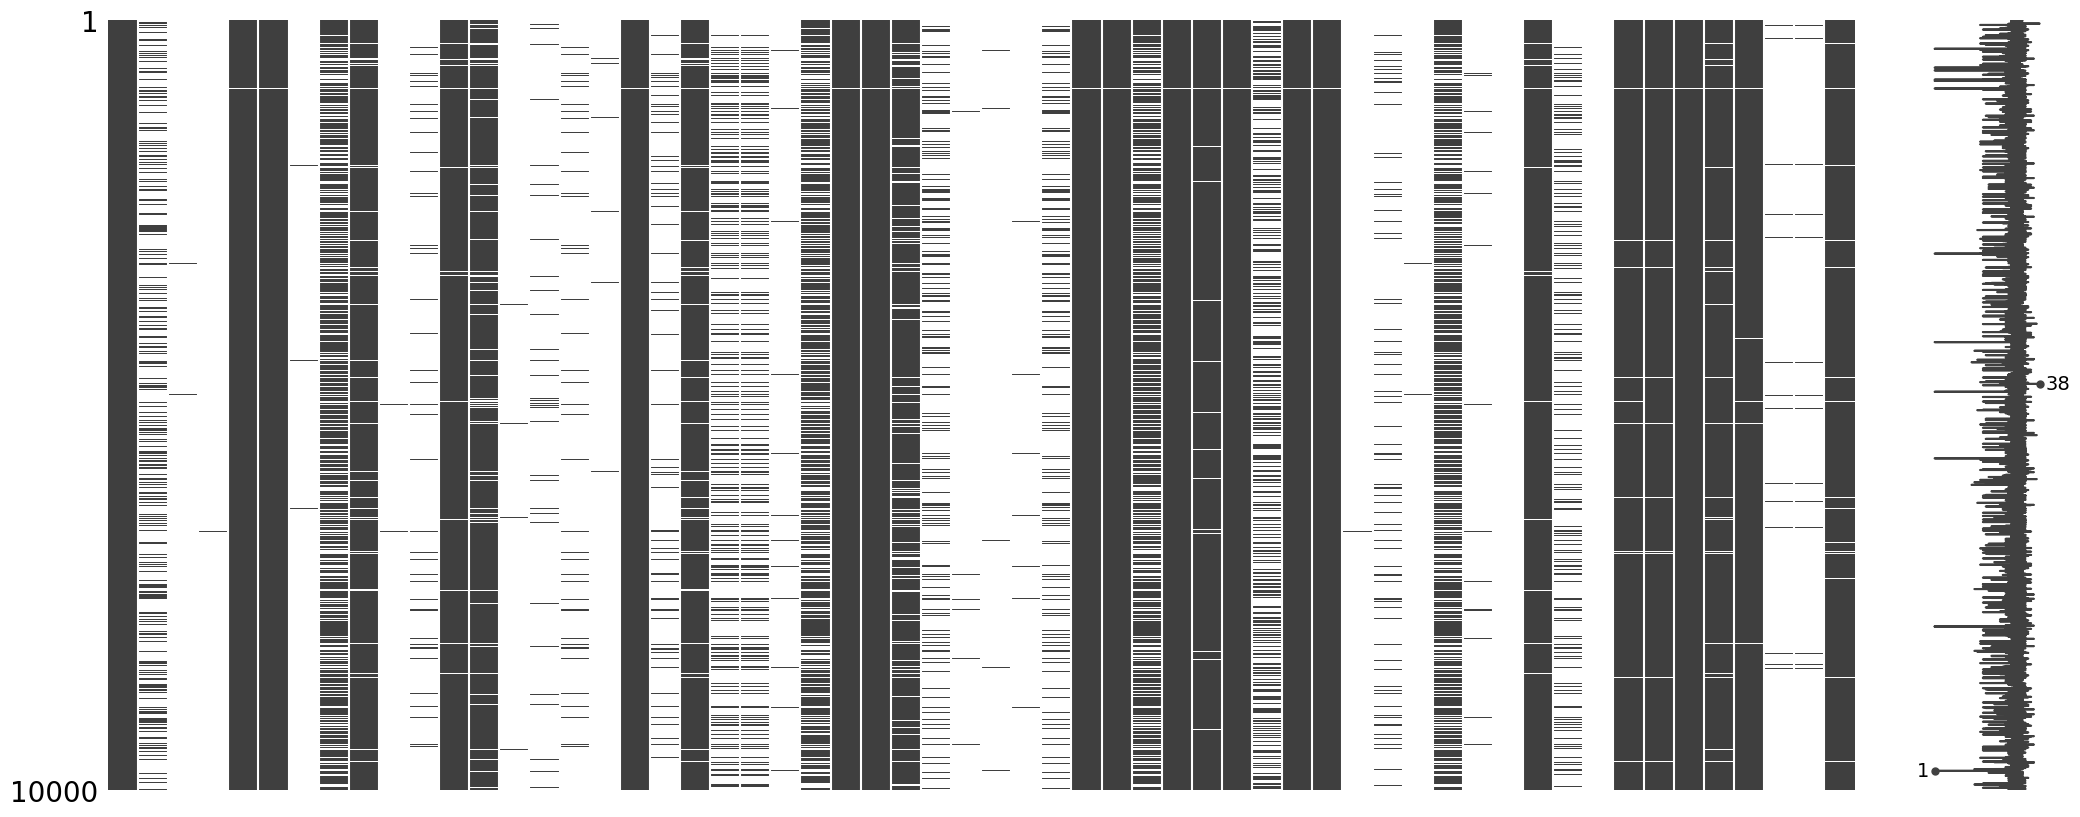

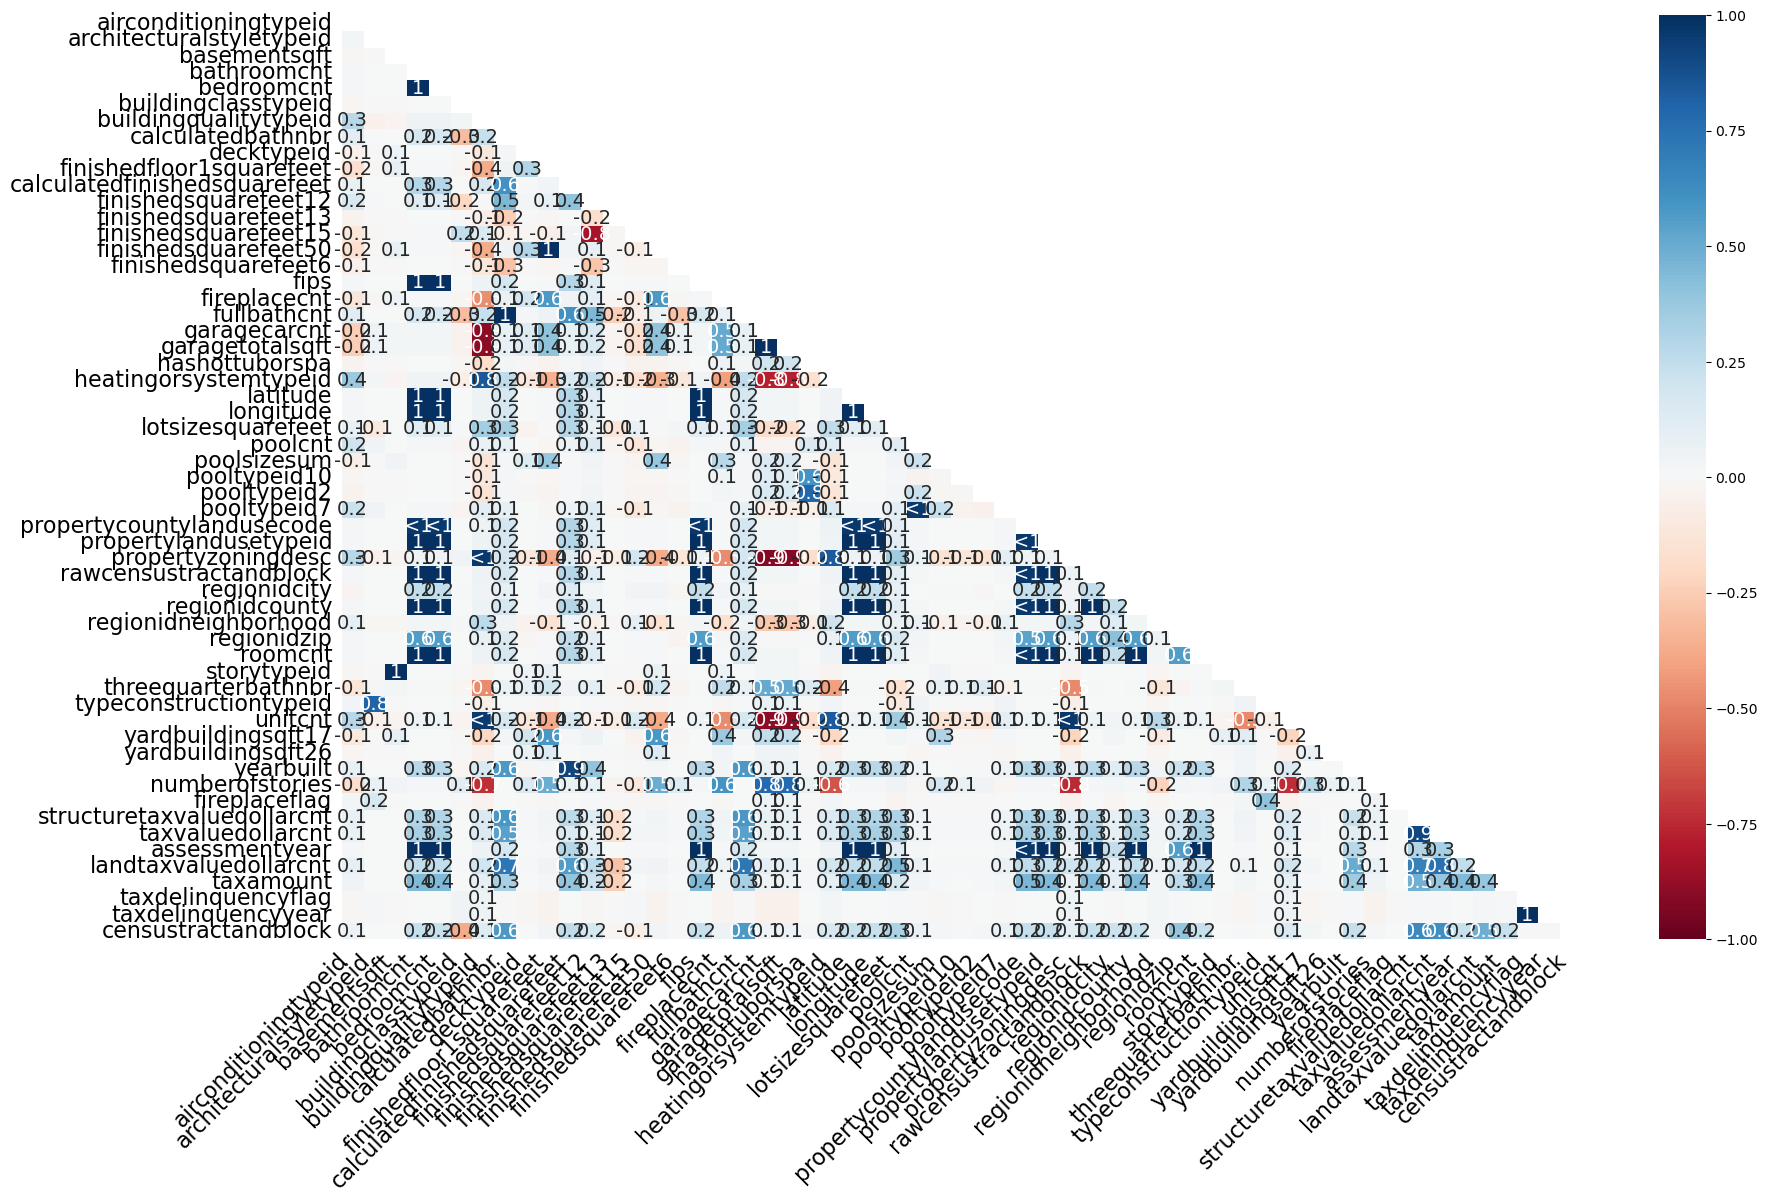

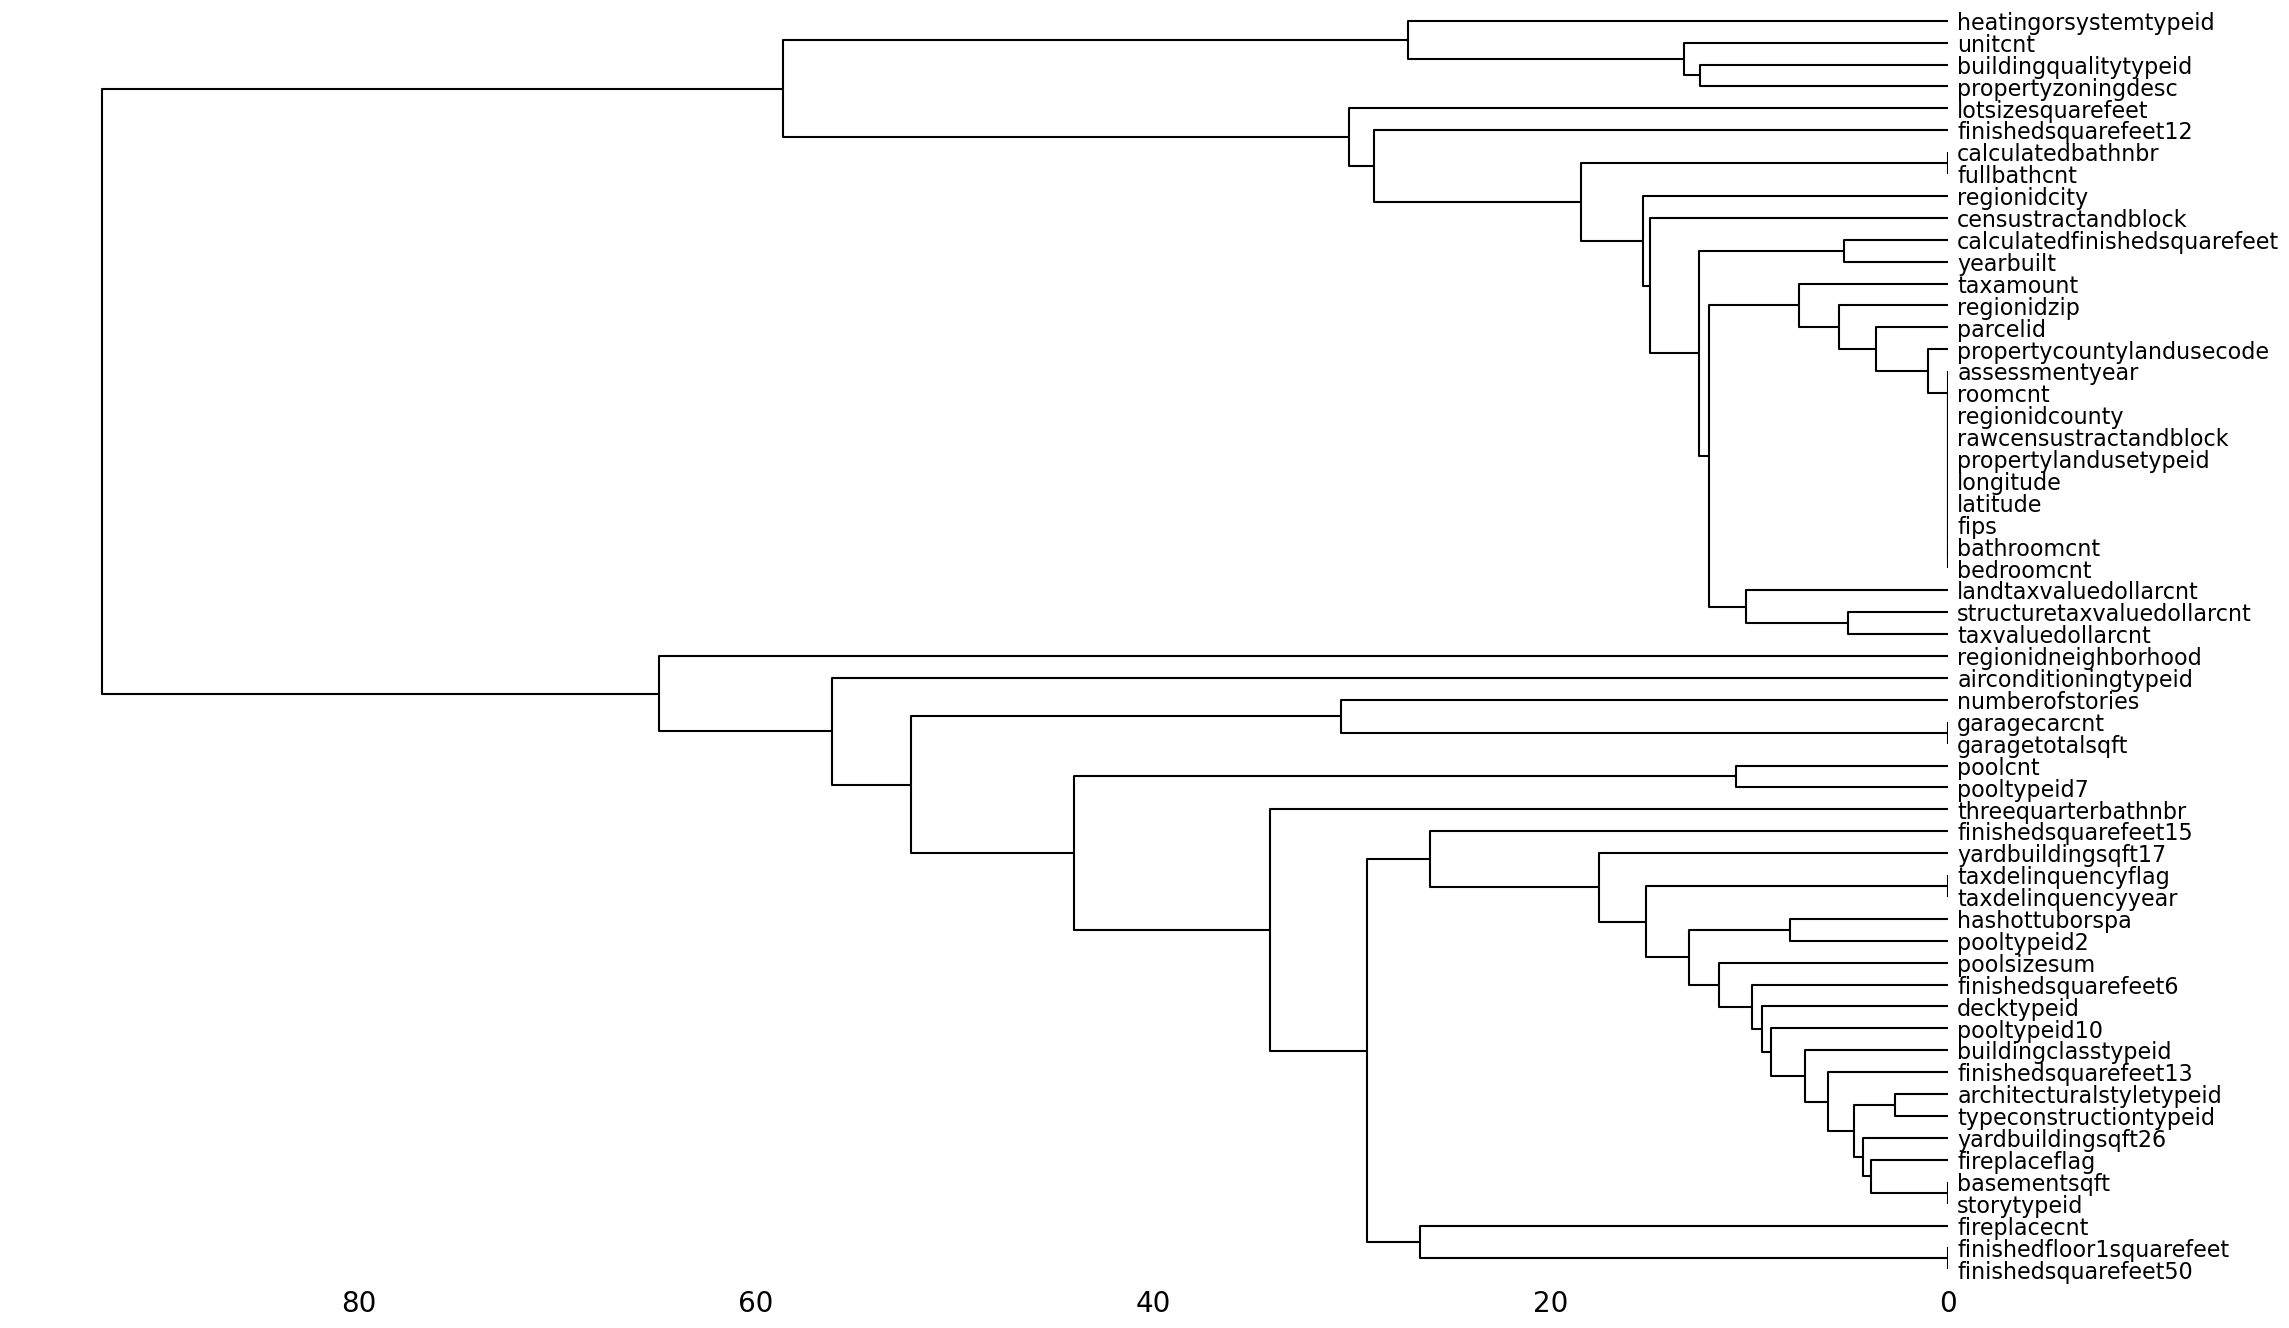

In [39]:
import missingno as msno
import matplotlib.pyplot as plt

# Matrix plot
msno.matrix(zillow_df)
#plt.show()

# Heatmap
msno.heatmap(zillow_df)
plt.show()

# Dendrogram
msno.dendrogram(zillow_df)
plt.show()


### Relationships are too complex at this point to make any sense. We need a more concise strategy to make things more manageable.

## Strategy

####  1)  Delete columns with a very high percentage of Missing values (60%-80% and above). In these cases there is too much information missing that an imputation strategy may not add much value

#### 2) The removal of high-count-Nan columns will make the analysis of relationships for MAR, MCAR, MNAR feasible

#### 3) Look at the features with the higher remaining percentages of Nan and by looking at the missinno Heatmap and Dendogram decide on a strategy to impute missing values

#### 4) for the remaining of columns with much smaller percentages of missing values, imputed them with the mean for numerical ones, and with the mode (most frequent) for the non-numerical ones

In [40]:
# Relationship are too complex at this point.  I decided to remove all columns with more than 60% missing values.
# this way the remaining columns analysis will be more manageable

# percentage of missing values for each column
percent_missing = zillow_df.isna().mean() * 100

# threshold. I decided 60
threshold = 60

# Filter out columns with missing value percentage greater than the threshold
filtered_df = zillow_df.loc[:, percent_missing <= threshold]



In [41]:
# let's repeat review of Nan and missingno package

# Lets see Nan by feature and what percentage of total is missing

# Calculate total NaN count for each column
nan_count = filtered_df.isna().sum()

# Calculate percentage of NaN values for each column
nan_percentage = (filtered_df.isna().sum() / len(filtered_df)) * 100

# Create a summary table
nan_summary = pd.DataFrame({
    'Column': filtered_df.columns,
    'Total NaN': nan_count,
    'Percentage NaN': nan_percentage
})

# Reset the index to make it more readable
nan_summary = nan_summary.reset_index(drop=True)

print(nan_summary)


                          Column  Total NaN  Percentage NaN
0                       parcelid          0            0.00
1                    bathroomcnt         13            0.13
2                     bedroomcnt         13            0.13
3          buildingqualitytypeid       3530           35.30
4              calculatedbathnbr        388            3.88
5   calculatedfinishedsquarefeet        149            1.49
6           finishedsquarefeet12        859            8.59
7                           fips         13            0.13
8                    fullbathcnt        388            3.88
9          heatingorsystemtypeid       3757           37.57
10                      latitude         13            0.13
11                     longitude         13            0.13
12             lotsizesquarefeet        925            9.25
13     propertycountylandusecode         14            0.14
14         propertylandusetypeid         13            0.13
15            propertyzoningdesc       3

In [42]:
# we dropped almost half the columns and we now have 29 columns, which is for sure
# more manageable than the original 58

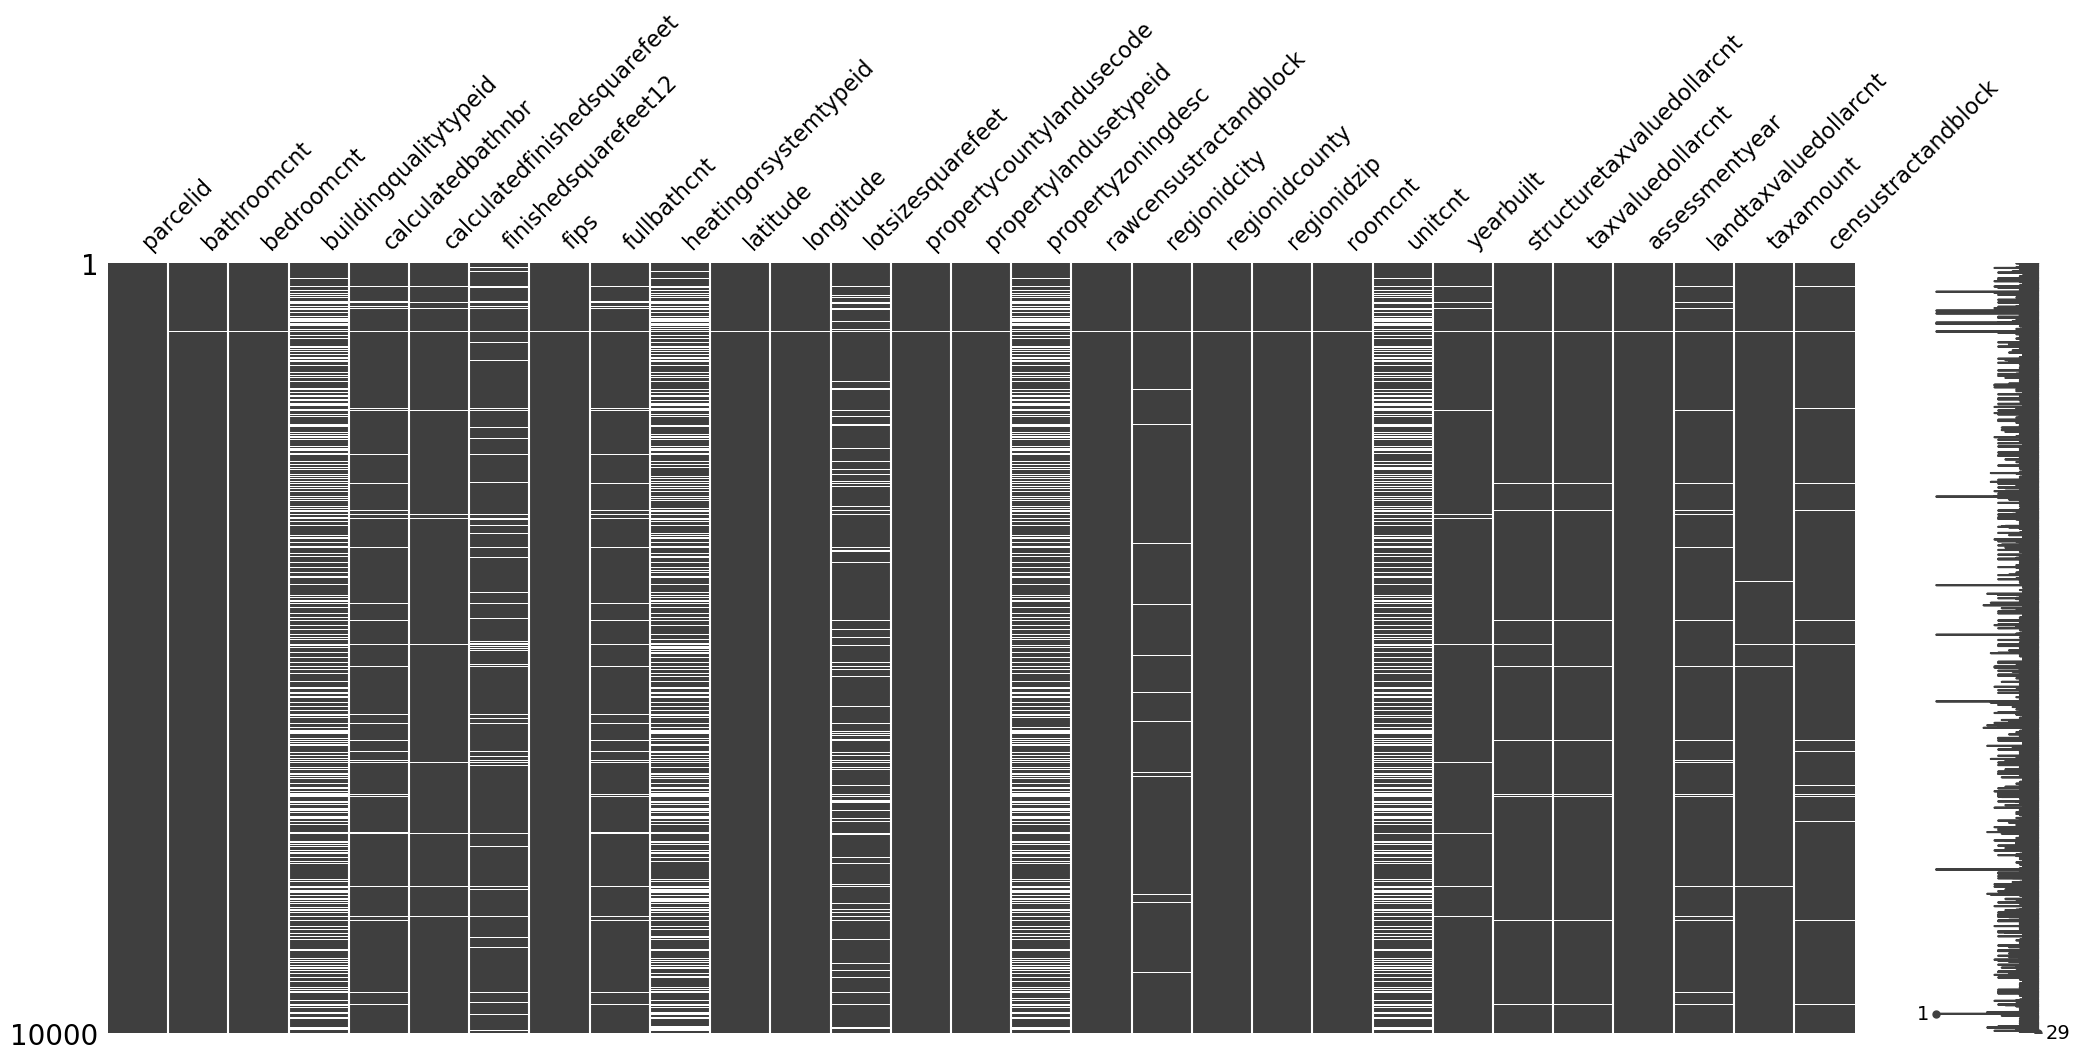

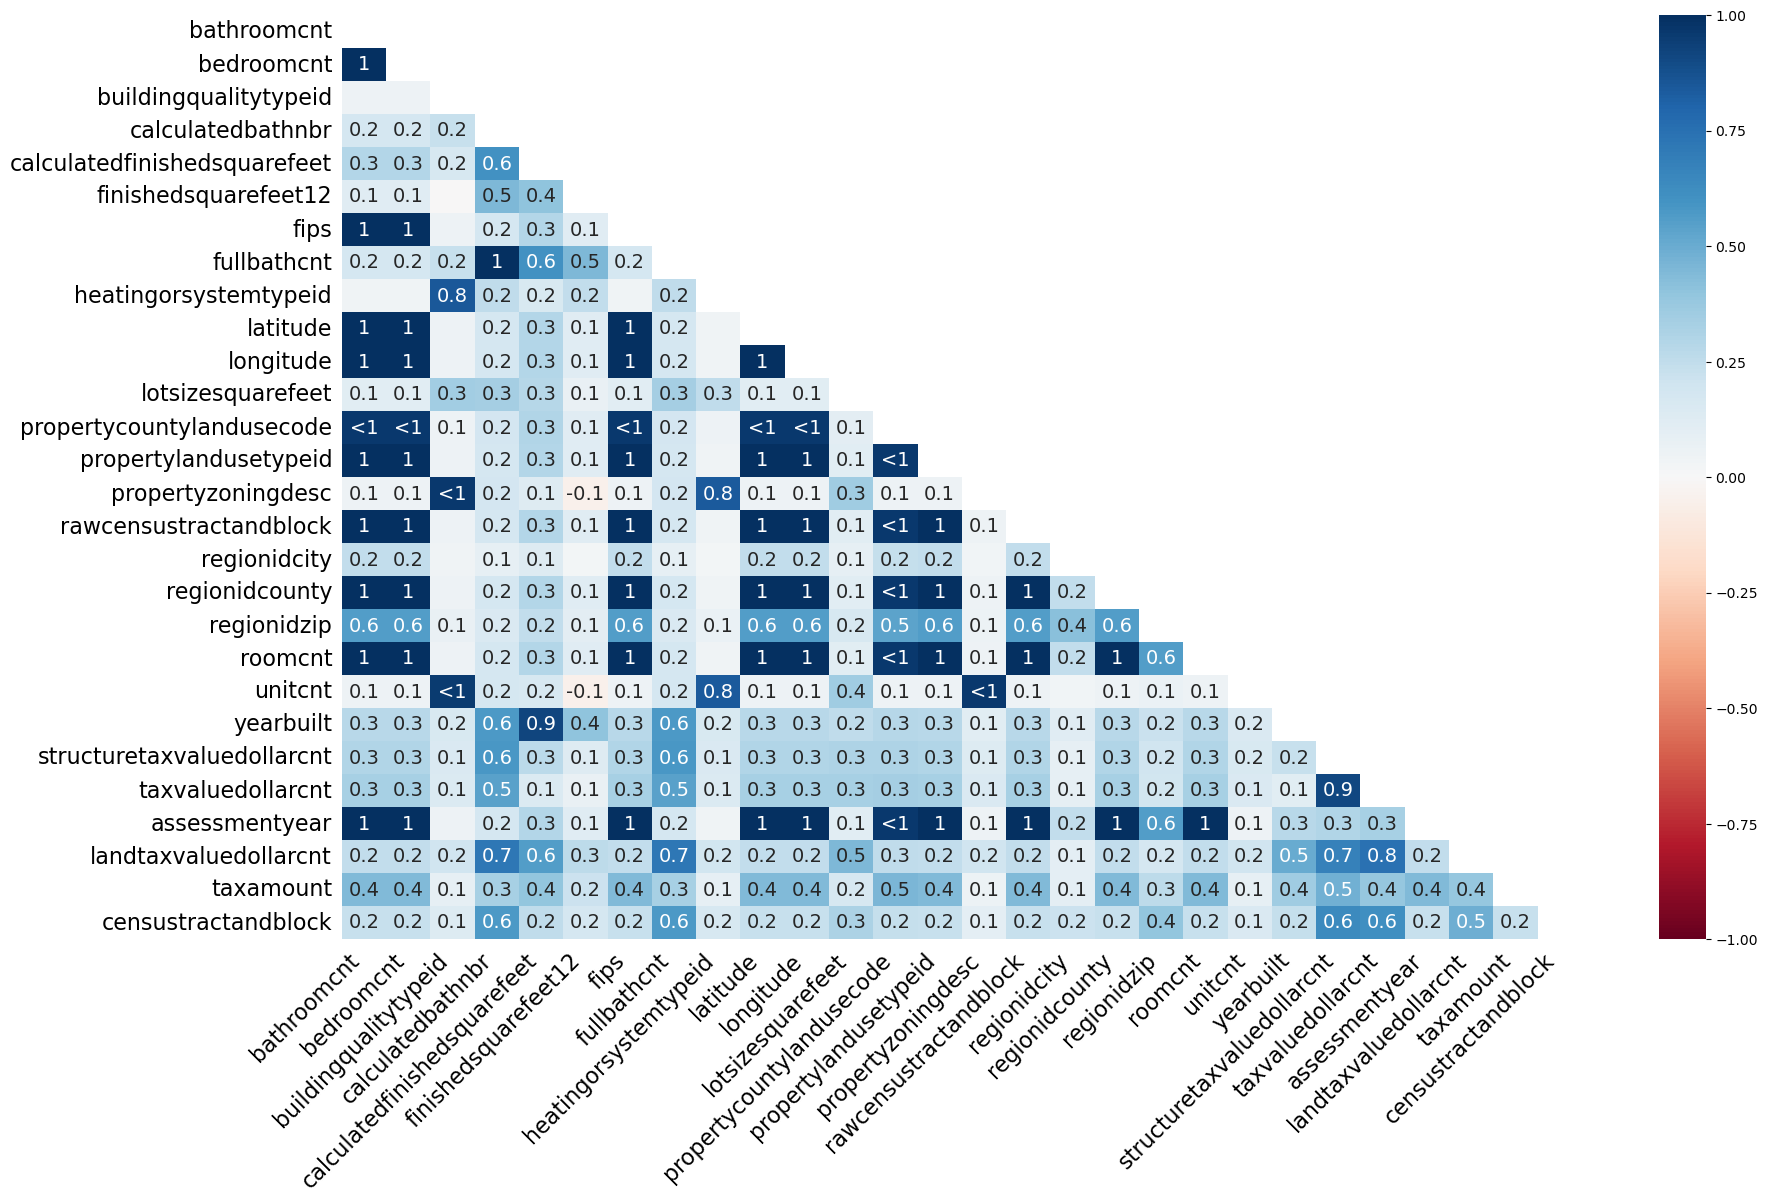

In [43]:
# Let's re-plot using missingno package

# Matrix plot
msno.matrix(filtered_df)
#plt.show()

# Heatmap
msno.heatmap(filtered_df)
plt.show()



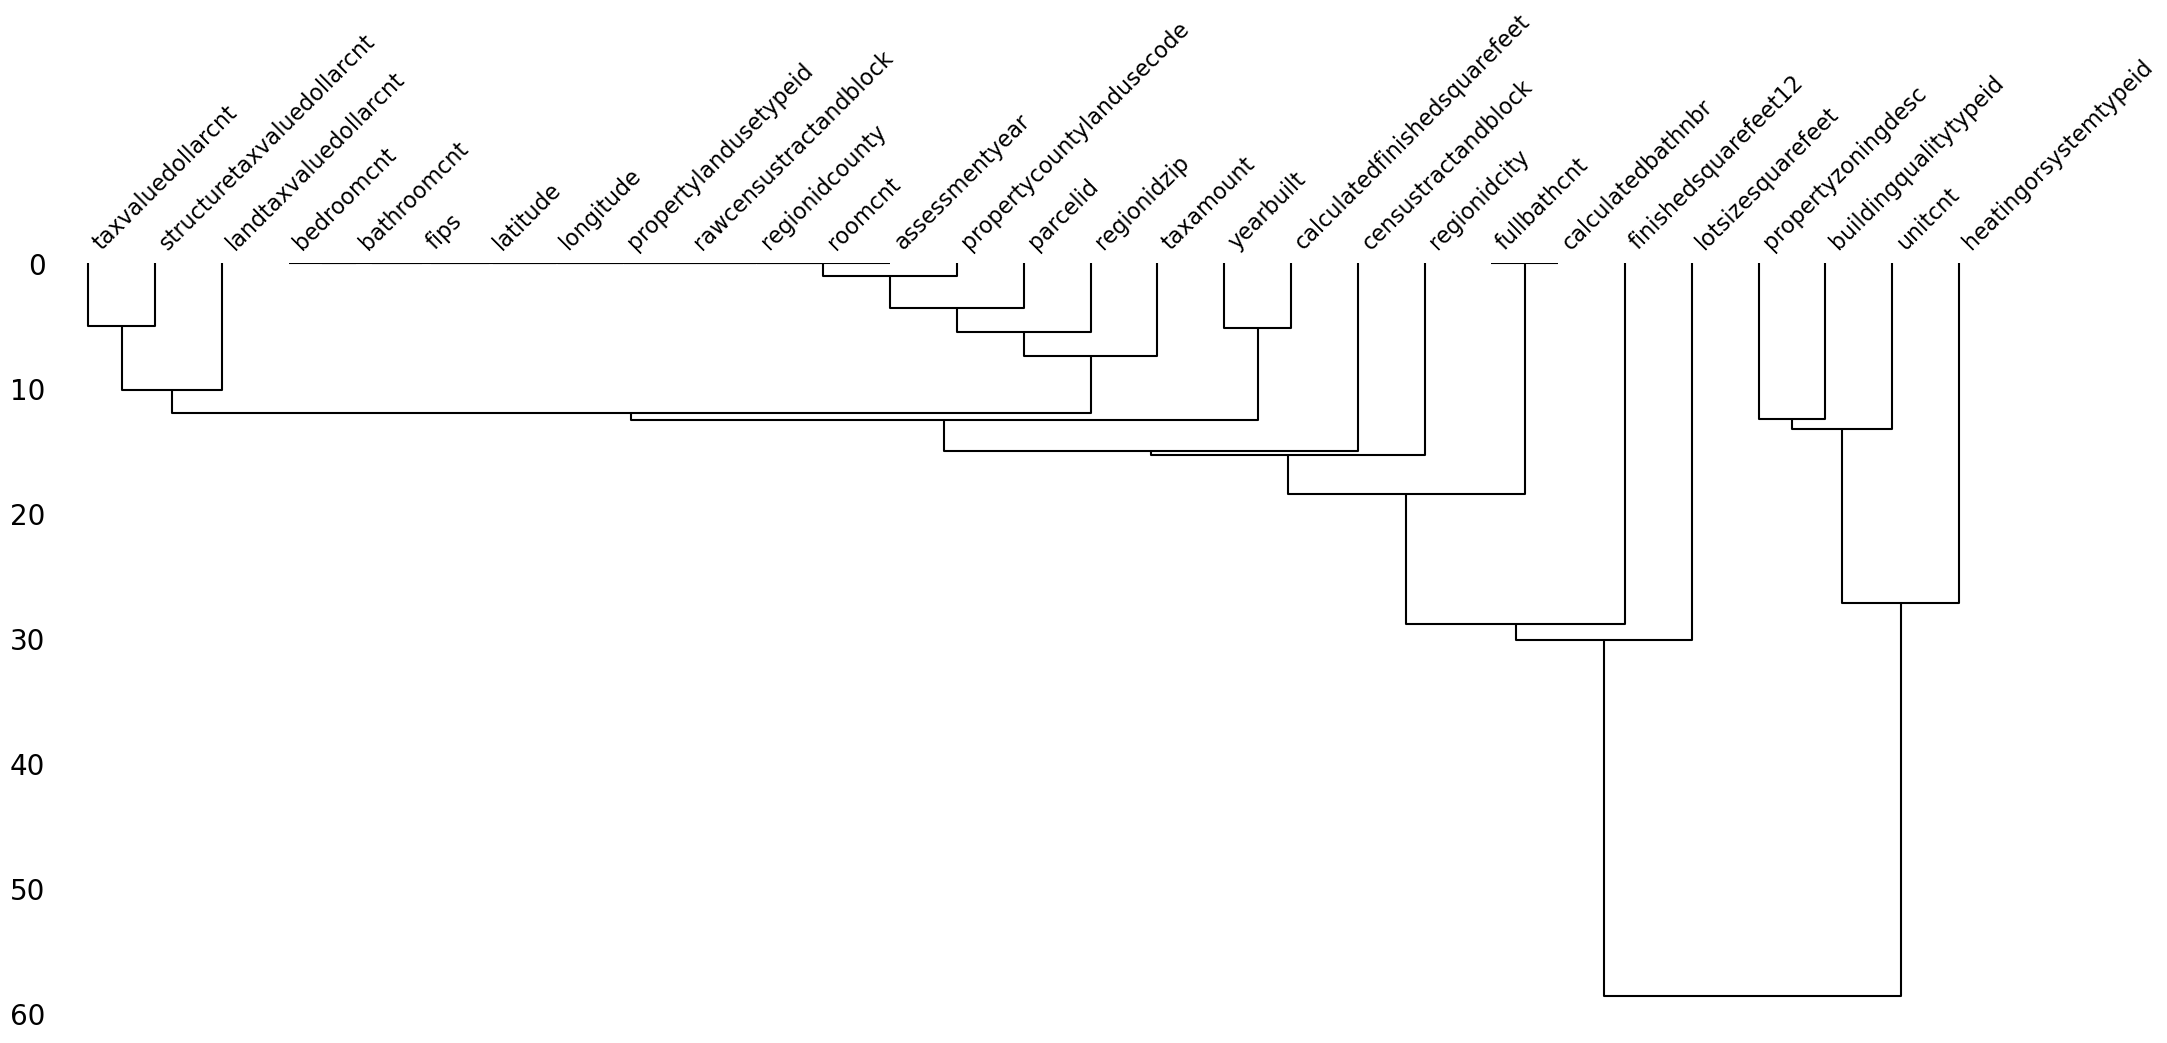

In [44]:
# Dendrogram
msno.dendrogram(filtered_df)
plt.show()


In [45]:
# Data looks MUCH MORE manageable now to look at and make sense of it,

## Lets now Look at all the features that are linked in the dendogram low in the hierachy

## BedroomCount and BathroomCount
### I found that in all these cases all other values were also missing
### I will delete these rows as well

filtered_df2 = filtered_df.dropna(subset=['bedroomcnt'])


In [46]:
# buildingqualitytypeid and propertyzoningdesc
# These two seem to be also corelated as per heatmap and dendogram

category_counts = filtered_df2['buildingqualitytypeid'].value_counts()
# Display the count of each category
print(category_counts)

category_counts = filtered_df2['propertyzoningdesc'].value_counts()
# Display the count of each category
print(category_counts)



buildingqualitytypeid
6.0     1806
8.0     1719
4.0     1496
7.0      600
5.0      365
9.0      253
11.0     109
3.0       69
10.0      40
12.0      12
1.0        1
Name: count, dtype: int64
propertyzoningdesc
LAR1          897
LAR3          222
LARS          196
LAR2          169
LBR1N         166
             ... 
GAHB            1
SMR4*           1
WAC3-RPD28      1
BPI*            1
EMC3            1
Name: count, Length: 955, dtype: int64


In [47]:
# We can see value are skewed toward a few values. For these we will replace Nan with MODE

# Replace NaN values with the most common value in 'buildingqualitytypeid'
most_common_value = filtered_df2['buildingqualitytypeid'].mode()[0]
filtered_df2.loc[:, 'buildingqualitytypeid'] = filtered_df2['buildingqualitytypeid'].fillna(most_common_value)

# Replace NaN values with the most common value in 'propertyzoningdesc'
most_common_value = filtered_df2['propertyzoningdesc'].mode()[0]
filtered_df2.loc[:, 'propertyzoningdesc'] = filtered_df2['propertyzoningdesc'].fillna(most_common_value)


In [48]:
# heatingorsystemtypeid and unitcnt
category_counts = filtered_df2['heatingorsystemtypeid'].value_counts()
# Display the count of each category
print(category_counts)

category_counts = filtered_df2['unitcnt'].value_counts()
# Display the count of each category
print(category_counts)



heatingorsystemtypeid
2.0     3906
7.0     2145
6.0       97
24.0      68
20.0      17
13.0       7
18.0       2
1.0        1
Name: count, dtype: int64
unitcnt
1.0    5959
2.0     360
4.0     154
3.0     124
7.0       1
6.0       1
5.0       1
Name: count, dtype: int64


In [49]:
# I will folllow same strategy replace with most common as values are for sure concentrated in a single category

# Replace NaN values with the most common value in 'heatingorsystemtypeid'
most_common_value = filtered_df2['heatingorsystemtypeid'].mode()[0]
filtered_df2.loc[:, 'heatingorsystemtypeid'] = filtered_df2['heatingorsystemtypeid'].fillna(most_common_value)

# Replace NaN values with the most common value in 'unitcnt'
most_common_value = filtered_df2['unitcnt'].mode()[0]
filtered_df2.loc[:, 'unitcnt'] = filtered_df2['unitcnt'].fillna(most_common_value)


In [50]:
# for the rest of values I will replace with the numerical ones with the mean rounded to the nearest full integer.
# For the non-numerical I will replace with the most frequent value

# make a copy and make changes on copy in case we need to revert something
filtered_df3 = filtered_df2.copy()

# Loop through each column in the DataFrame
for column in filtered_df3.columns:
    # Check if the column is numeric
    if filtered_df3[column].dtype.kind in 'biufc':  # Numeric types
        # Calculate the mean, round it, and fill NaN values
        filtered_df3[column] = filtered_df3[column].fillna(filtered_df3[column].mean().round())
    else:
        # For non-numeric columns, fill NaN with the mode (most common value)
        filtered_df3[column] = filtered_df3[column].fillna(filtered_df3[column].mode()[0])

In [51]:
# Let's check to make sure no Nan remain

# Calculate total NaN count for each column
nan_count = filtered_df3.isna().sum()

# Calculate percentage of NaN values for each column
nan_percentage = (filtered_df3.isna().sum() / len(filtered_df3)) * 100

# Create a summary table
nan_summary = pd.DataFrame({
    'Column': filtered_df3.columns,
    'Total NaN': nan_count,
    'Percentage NaN': nan_percentage
})

# Reset the index to make it more readable
nan_summary = nan_summary.reset_index(drop=True)

print(nan_summary)


                          Column  Total NaN  Percentage NaN
0                       parcelid          0             0.0
1                    bathroomcnt          0             0.0
2                     bedroomcnt          0             0.0
3          buildingqualitytypeid          0             0.0
4              calculatedbathnbr          0             0.0
5   calculatedfinishedsquarefeet          0             0.0
6           finishedsquarefeet12          0             0.0
7                           fips          0             0.0
8                    fullbathcnt          0             0.0
9          heatingorsystemtypeid          0             0.0
10                      latitude          0             0.0
11                     longitude          0             0.0
12             lotsizesquarefeet          0             0.0
13     propertycountylandusecode          0             0.0
14         propertylandusetypeid          0             0.0
15            propertyzoningdesc        

# EDA (Exploratory Data Analysis)

In [52]:
# Let's see some stats
filtered_df3.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,9.987000e+03,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,...,9987.000000,9987.000000,9987.000000,9987.000000,9.987000e+03,9.987000e+03,9987.000000,9.987000e+03,9987.000000,9.987000e+03
mean,1.327666e+07,2.226194,3.090918,6.200761,2.300941,1833.434865,1778.279864,6048.190347,2.246821,3.303995,...,96603.308701,1.513668,1.108641,1964.539601,1.774115e+05,4.433176e+05,2015.998298,2.688308e+05,5391.372573,6.048572e+13
std,7.307551e+06,1.082078,1.259112,1.420236,0.990682,1091.187336,944.888094,20.304988,0.981635,2.794358,...,5269.030304,2.869323,0.469490,23.508015,2.134786e+05,5.652029e+05,0.053862,4.042215e+05,6502.112185,1.996323e+11
min,1.071196e+07,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,6037.000000,1.000000,1.000000,...,95982.000000,0.000000,1.000000,1861.000000,9.000000e+00,7.000000e+00,2014.000000,7.000000e+00,21.440000,6.037101e+13
25%,1.163651e+07,2.000000,2.000000,6.000000,2.000000,1219.500000,1226.000000,6037.000000,2.000000,2.000000,...,96185.000000,0.000000,1.000000,1950.000000,7.940850e+04,1.945895e+05,2016.000000,8.597200e+04,2517.250000,6.037400e+13
50%,1.255952e+07,2.000000,3.000000,6.000000,2.000000,1589.000000,1624.000000,6037.000000,2.000000,2.000000,...,96378.000000,0.000000,1.000000,1964.000000,1.298740e+05,3.292980e+05,2016.000000,1.853680e+05,4078.110000,6.037574e+13
75%,1.411904e+07,3.000000,4.000000,7.000000,3.000000,2150.500000,2020.500000,6059.000000,3.000000,2.000000,...,96974.000000,0.000000,1.000000,1981.000000,2.045370e+05,5.196625e+05,2016.000000,3.299560e+05,6292.190000,6.059042e+13
max,1.681826e+08,12.000000,12.000000,12.000000,12.000000,35560.000000,35560.000000,6111.000000,12.000000,24.000000,...,399675.000000,14.000000,7.000000,2015.000000,5.275190e+06,1.931094e+07,2016.000000,1.421794e+07,224000.930000,6.111009e+13


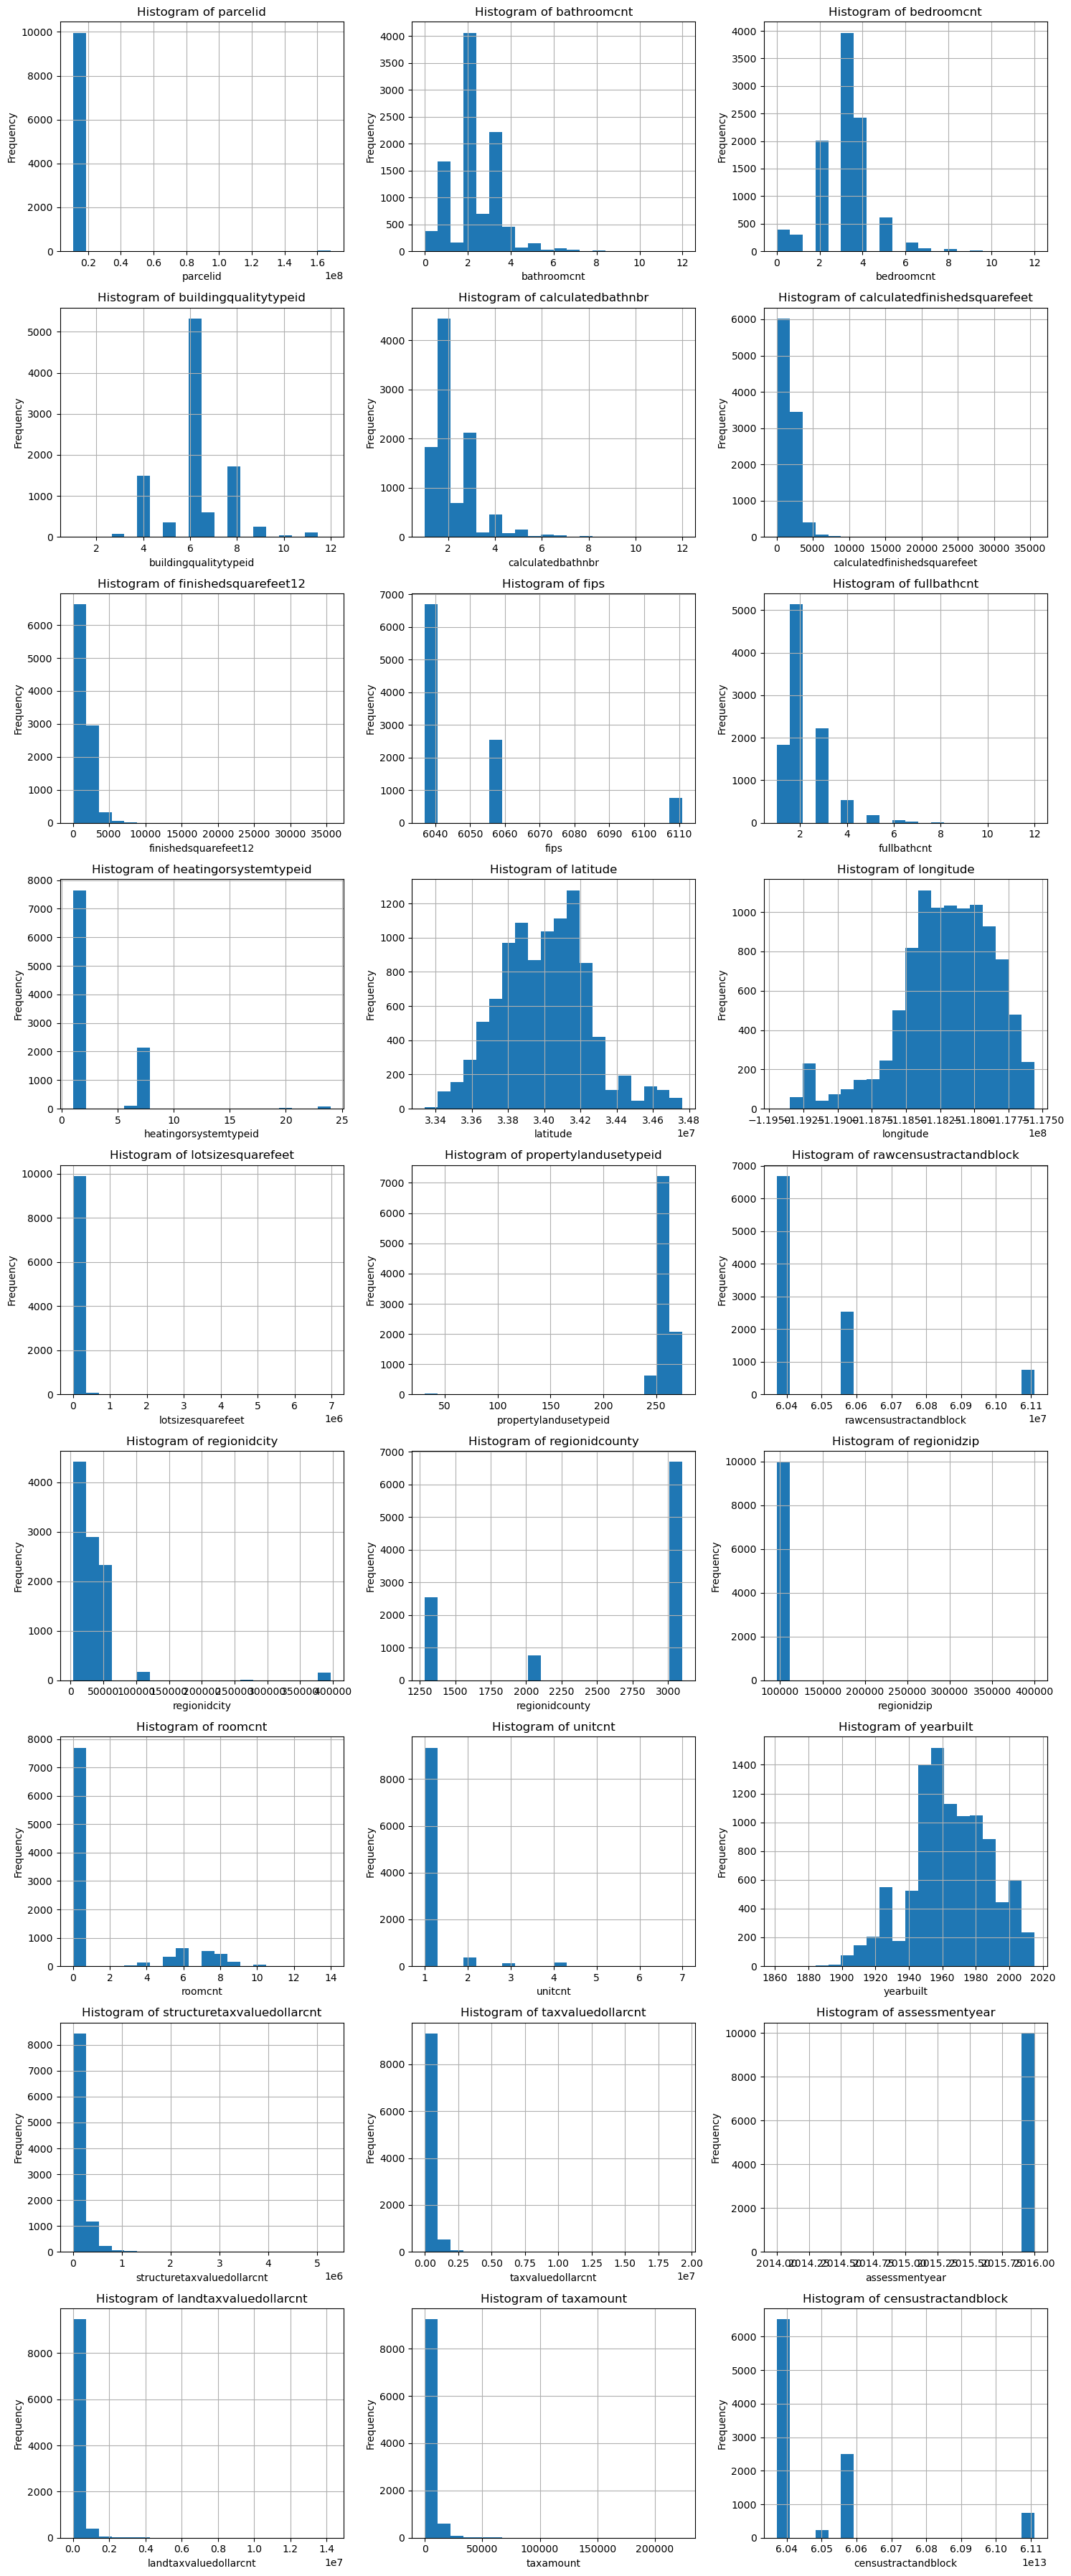

In [53]:
# Let's plot some histograms

# Filter out only numeric columns
numeric_cols = filtered_df3.select_dtypes(include=['number']).columns

# Determine the number of rows needed for the subplot grid
num_rows = len(numeric_cols) // 3 + (len(numeric_cols) % 3 > 0)

# Set the overall figure size
plt.figure(figsize=(15, 4 * num_rows))  # Width of 15 and height depending on the number of rows

# Loop through each numeric column and create a subplot
for i, column in enumerate(numeric_cols, 1):  # Start enumeration at 1
    plt.subplot(num_rows, 3, i)  # (num_rows, 3 columns, subplot index)
    filtered_df3[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### We can see our data shows all type of shapes. While a few features show some normality like: longitude, latitude and year built. The rest are are skewed positively and negatively. These skewed features would benefit from a logaritmic transformation in case we were trying to use the dataset for prediction